In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leitura, exclusão da coluna sinopse do data frame, traduzindo o numero das colunas e testando visualização (coluna "adulto" excluida pois todos os valores eram false)
filmes_populares = pd.read_csv('https://raw.githubusercontent.com/EmanuelledeSouza/MoviesDataToMarketing/main/LatestPopularMoviesDataset.csv', lineterminator='\n')
cols = list(filmes_populares.columns.values)
filmes_populares = filmes_populares[cols[1:3]+cols[4:7]]
filmes_populares.columns = ['titulo', 'lançamento', 'lingua', 'qt_votos', 'media_votos']
print(filmes_populares.head())

                              titulo  lançamento lingua  qt_votos  media_votos
0            Spider-Man: No Way Home  2021-12-15     en      6446          8.4
1                           Eternals  2021-11-03     en      3716          7.2
2  Hotel Transylvania: Transformania  2022-01-13     en      1289          7.6
3                            Encanto  2021-11-24     en      3613          7.8
4                             Sing 2  2021-12-01     en      1457          8.3


In [3]:
filmes_populares.describe()

,qt_votos,media_votos
count,9783.000000,9783.000000
mean,1380.153532,6.483737
std,2589.661188,0.965232
min,1.000000,1.000000
25%,133.000000,5.900000
50%,446.000000,6.500000
75%,1368.500000,7.100000
max,30825.000000,10.000000


In [4]:
filmes_populares.sort_values('media_votos', ascending = False)

,titulo,lançamento,lingua,qt_votos,media_votos
4148,A Culpa é do Neymar,2015-07-01,pt,2,10.0
5695,Cristiano Ronaldo: Impossible to Ignore,2021-05-30,en,1,10.0
3565,Cristiano Ronaldo: The One and Only,2020-01-01,en,2,10.0
795,Spider-Man PS5 :The Movie,NaN,en,1,10.0
8241,Karamora,2021-09-23,ru,1,10.0
...,...,...,...,...,...
2887,DRagON BALL P2 2wice dropda bbeet,2008-07-01,en,2,1.5
4328,My Father's Other Family,2021-04-18,en,2,1.5
3804,Harry Potter: Different Perspective,2021-08-10,en,2,1.5
1161,Porno Emperor,1971-05-02,fr,2,1.3


In [5]:
filmes_populares.sort_values('lançamento', ascending = False)

,titulo,lançamento,lingua,qt_votos,media_votos
6110,Fireheart,2022-02-02,en,2,7.8
8840,Superwho?,2022-02-02,fr,1,6.5
3515,Butlers in Love,2022-01-29,en,1,6.0
484,The Requin,2022-01-28,en,4,3.8
893,Clean,2022-01-28,en,9,6.6
...,...,...,...,...,...
8946,A Trip to the Moon,1902-04-17,fr,1261,8.0
7927,Roundhay Garden Scene,1888-10-14,xx,141,6.3
9322,Sallie Gardner at a Gallop,1878-06-14,xx,107,6.7
795,Spider-Man PS5 :The Movie,NaN,en,1,10.0


In [6]:
#exclusão dos filmes lançados antes de junho de 2021
indexN = filmes_populares[filmes_populares['lançamento'] < '2021-07-01'].index
filmes_populares.drop(indexN, inplace=True)

In [7]:
#exclusão dos filmes que possuem menos de 446 votos (mediana)
indexN = filmes_populares[filmes_populares['qt_votos'] < 446].index
filmes_populares.drop(indexN, inplace=True)

In [8]:
#exclusão dos filmes que possuem média de nota menor que 8
indexM = filmes_populares[filmes_populares['media_votos'] < 8].index
filmes_populares.drop(indexM, inplace=True)

In [9]:
#adicionando generos e classificação dos filmes que passaram nos filtros e cruzando as tabelas
genero_idade = pd.read_csv('https://raw.githubusercontent.com/EmanuelledeSouza/MoviesDataToMarketing/main/GeneroIdade.csv', encoding = 'utf-8')
genero_idade = genero_idade.sort_values('titulo')
filmes_populares = filmes_populares.sort_values('titulo', ascending = True)
filmes_populares = pd.merge(filmes_populares, genero_idade, how = 'right', on = 'titulo')
filmes_populares


,titulo,lançamento,lingua,qt_votos,media_votos,gen1,gen2,gen3,classificação
0,CODA,2021-08-11,en,448,8.2,Comédia,Drama,Musical,14
1,Finch,2021-11-04,en,1880,8.1,Aventura,Drama,Ficção Científica,12
2,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,en,852,8.3,Documentário,Família,Fantasia,10
3,King Richard,2021-11-18,en,559,8.1,Biografia,Drama,Esportes,12
4,Ron's Gone Wrong,2021-10-15,en,778,8.2,Animação,Aventura,Comédia,0
5,Sing 2,2021-12-01,en,1457,8.3,Animação,Aventura,Comédia,0
6,Spider-Man: No Way Home,2021-12-15,en,6446,8.4,Ação,Aventura,Fantasia,12
7,The Tomorrow War,2021-07-02,en,5009,8.0,Ação,Aventura,Drama,14


In [10]:
#certificando que todas as colunas possuem a mesma quantidade de valores
filmes_populares.count()

titulo           8
lançamento       8
lingua           8
qt_votos         8
media_votos      8
gen1             8
gen2             8
gen3             8
classificação    8
dtype: int64

In [11]:
#ordenando por média
filmes_populares = filmes_populares.sort_values('media_votos', ascending = True)
filmes_populares

,titulo,lançamento,lingua,qt_votos,media_votos,gen1,gen2,gen3,classificação
7,The Tomorrow War,2021-07-02,en,5009,8.0,Ação,Aventura,Drama,14
1,Finch,2021-11-04,en,1880,8.1,Aventura,Drama,Ficção Científica,12
3,King Richard,2021-11-18,en,559,8.1,Biografia,Drama,Esportes,12
0,CODA,2021-08-11,en,448,8.2,Comédia,Drama,Musical,14
4,Ron's Gone Wrong,2021-10-15,en,778,8.2,Animação,Aventura,Comédia,0
2,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,en,852,8.3,Documentário,Família,Fantasia,10
5,Sing 2,2021-12-01,en,1457,8.3,Animação,Aventura,Comédia,0
6,Spider-Man: No Way Home,2021-12-15,en,6446,8.4,Ação,Aventura,Fantasia,12


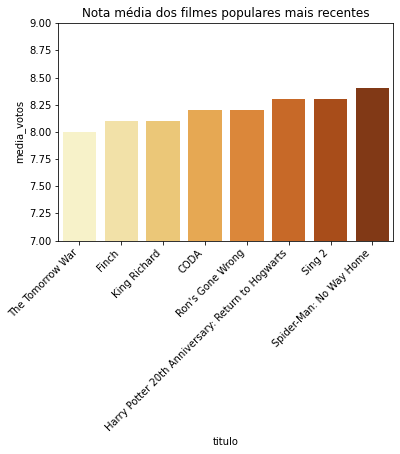

In [12]:
#gráfico de médias
graf1 = sns.barplot(x = filmes_populares['titulo'], y = filmes_populares['media_votos'], palette = 'YlOrBr')
graf1.set_xticklabels(graf1.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Nota média dos filmes populares mais recentes')
plt.ylim(7,9)
plt.show()

In [13]:
#ordenando por classificação etária
filmes_populares = filmes_populares.sort_values('classificação', ascending = True)
filmes_populares

,titulo,lançamento,lingua,qt_votos,media_votos,gen1,gen2,gen3,classificação
4,Ron's Gone Wrong,2021-10-15,en,778,8.2,Animação,Aventura,Comédia,0
5,Sing 2,2021-12-01,en,1457,8.3,Animação,Aventura,Comédia,0
2,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,en,852,8.3,Documentário,Família,Fantasia,10
1,Finch,2021-11-04,en,1880,8.1,Aventura,Drama,Ficção Científica,12
3,King Richard,2021-11-18,en,559,8.1,Biografia,Drama,Esportes,12
6,Spider-Man: No Way Home,2021-12-15,en,6446,8.4,Ação,Aventura,Fantasia,12
7,The Tomorrow War,2021-07-02,en,5009,8.0,Ação,Aventura,Drama,14
0,CODA,2021-08-11,en,448,8.2,Comédia,Drama,Musical,14


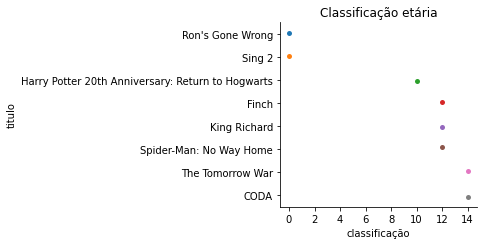

In [14]:
#grafico de classificação
graf2 = sns.catplot(x = 'classificação', y = 'titulo', data = filmes_populares)
graf2.figure.set_size_inches(15, 3)
plt.title('Classificação etária')
plt.xticks(np.arange(0,15, 2))
plt.show()

In [15]:
#Ficando apenas com 1 filme por classificação, usando a quantidade de votos como paramêtro
filmes_populares = filmes_populares.sort_values('qt_votos', ascending=False)
filmes_populares = filmes_populares.drop_duplicates(subset='classificação', keep='first')
filmes_populares

,titulo,lançamento,lingua,qt_votos,media_votos,gen1,gen2,gen3,classificação
6,Spider-Man: No Way Home,2021-12-15,en,6446,8.4,Ação,Aventura,Fantasia,12
7,The Tomorrow War,2021-07-02,en,5009,8.0,Ação,Aventura,Drama,14
5,Sing 2,2021-12-01,en,1457,8.3,Animação,Aventura,Comédia,0
2,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,en,852,8.3,Documentário,Família,Fantasia,10


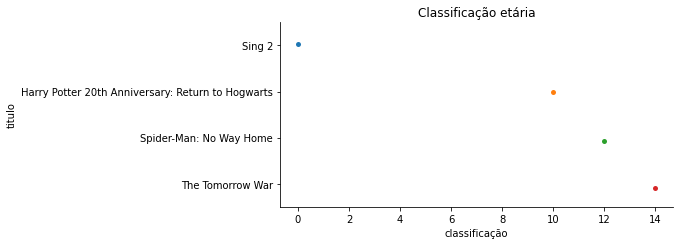

In [16]:
#novo gráfico classificação
filmes_populares = filmes_populares.sort_values('classificação', ascending = True)
graf3 = sns.catplot(x = 'classificação', y = 'titulo', data = filmes_populares)
graf3.figure.set_size_inches(30, 3)
plt.title('Classificação etária')
plt.xticks(np.arange(0,15, 2))
plt.show()

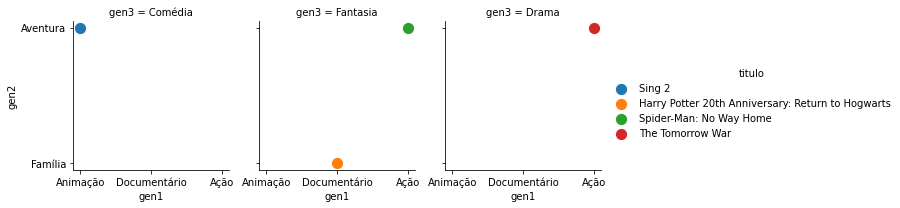

In [17]:
#novo grafico por genero
g2 = sns.FacetGrid(filmes_populares,col = 'gen3', hue="titulo", height=3, aspect = 1)
g2.map(sns.scatterplot, "gen1", "gen2", s=150, alpha=1)
g2.add_legend()

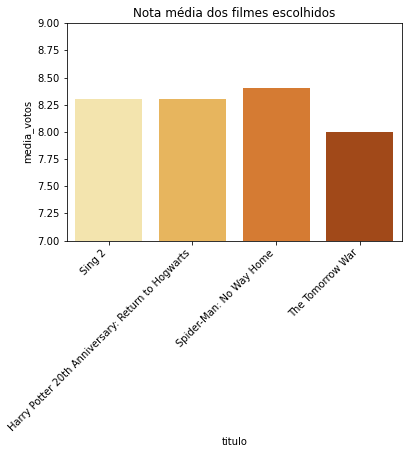

In [18]:
#novo gráfico de médias
graf4 = sns.barplot(x = filmes_populares['titulo'], y = filmes_populares['media_votos'], palette = 'YlOrBr')
graf4.set_xticklabels(graf4.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Nota média dos filmes escolhidos')
plt.ylim(7,9)
plt.show()

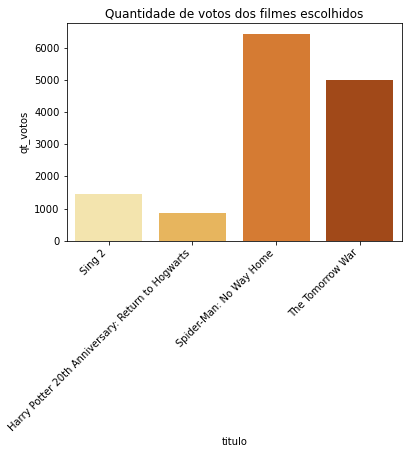

In [19]:
#gráfico de quantidade de votos
graf5 = sns.barplot(x = filmes_populares['titulo'], y = filmes_populares['qt_votos'], palette = 'YlOrBr')
graf5.set_xticklabels(graf5.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Quantidade de votos dos filmes escolhidos')
plt.show()